In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('./course-data/Advertising.csv')

In [3]:
df.info()
# Question: is there a relationship between how much we're spending on advertisement versus the result we get in sales

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [4]:
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


In [5]:
df['total_spend'] = df['TV'] + df['radio'] + df['newspaper']

# note that df['total'] is an engineered feature since it didn't exist in the original data (an aggregation of information)

In [6]:
df.head()
# here X is the total expenditures df.total_spend and y is the sales df.sales

,TV,radio,newspaper,sales,total_spend
0,230.1,37.8,69.2,22.1,337.1
1,44.5,39.3,45.1,10.4,128.9
2,17.2,45.9,69.3,9.3,132.4
3,151.5,41.3,58.5,18.5,251.3
4,180.8,10.8,58.4,12.9,250.0


In [7]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0
total_spend,200.0,200.8605,92.985181,11.7,123.550,207.35,281.125,433.6


<AxesSubplot:xlabel='total_spend', ylabel='sales'>

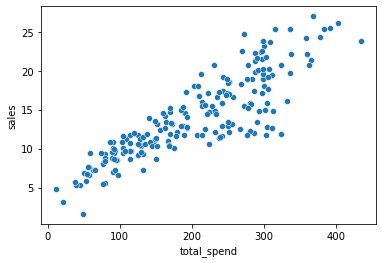

In [8]:
sns.scatterplot(data=df, x='total_spend',y='sales')

<AxesSubplot:xlabel='total_spend', ylabel='sales'>

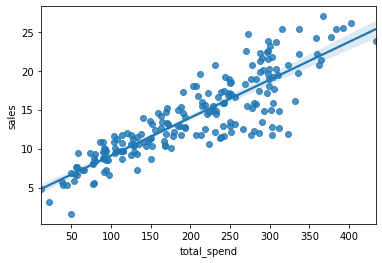

In [9]:
sns.regplot(data=df, x='total_spend',y='sales')

In [10]:
X = df['total_spend']
y = df['sales']

In [11]:
# help(np.polyfit)
# y = mx + b
# y = B1x + B0

In [12]:
beta = np.polyfit(X,y,deg=1)
beta
# this method return the coefficients B1 and B0

array([0.04868788, 4.24302822])

In [13]:
pontetial_spend = np.linspace(0,500,101)

In [14]:
predicted_sales = beta[0]*pontetial_spend + beta[1]

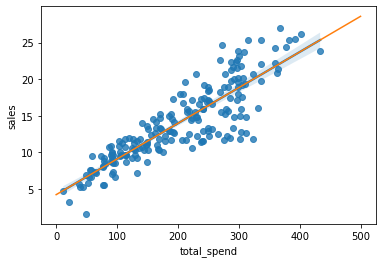

In [15]:
sns.regplot(data=df, x='total_spend',y='sales')
plt.plot(pontetial_spend, predicted_sales)

In [16]:
predicted200 = beta[0]*200 + beta[1]
predicted200

13.98060407984596

In [17]:
beta3 = np.polyfit(X,y,3)
beta3
# y = B3 x**3 + B2 x**2 + B1x + B0 -> we fit to a higher order
# note that third and second order coefficients are quite small -> there is less information in x**3 and x**2 -> there is no real higher order relationship

array([ 3.07615033e-07, -1.89392449e-04,  8.20886302e-02,  2.70495053e+00])

In [18]:
len(pontetial_spend)

101

In [19]:
predicted_sales3 = np.zeros(len(pontetial_spend))

for i in range(len(beta3)):
    predicted_sales3 += beta3[i]*pontetial_spend**(3-i)

In [20]:
# alternative
# predict_sales3 = np.zeros(len(pontetial_spend)) <- this line is not neccesary

# for i,b in enumerate(beta3): 
#     predicted_sales3 += b*pontetial_spend**(3-i)

# predicted_sales3 = beta3[0]*ps**(3-0) + beta3[1]*ps**(3-1) + beta3[2]*ps**(3-2) + beta3[3]*ps**(3-3)

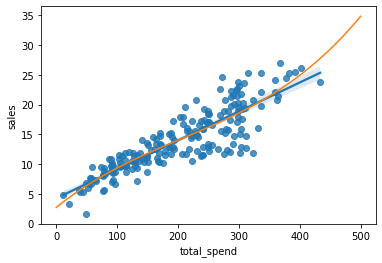

In [21]:
sns.regplot(data=df, x='total_spend',y='sales')
plt.plot(pontetial_spend, predicted_sales3) 

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
df = pd.read_csv('./course-data/Advertising.csv')

In [24]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


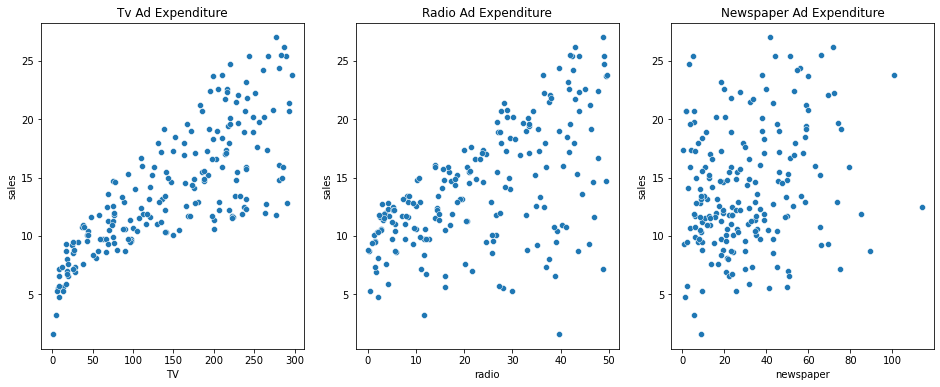

In [25]:
# First, explore visually

fig,axes = plt.subplots(nrows=1, ncols=3,figsize=(16,6))

for i, column in enumerate(df.drop('sales', axis=1)):
    sns.scatterplot(data=df, x=column, y='sales', ax=axes[i])
    axes[i].set_title(f'{column.capitalize()} Ad Expenditure') 

# for i in range(len(axes)): 
#     print(i)
#     axes[i] = sns.scatterplot(data=df, x=df.iloc[:,i], y=df['sales'])

# for ax in df.drop('sales',axis=1):
#     sns.scatterplot()

# note that TV and Radio Spend do have some kind of positive correlation: as we increase TV and Radio Ad Expenditure, sales are more likely to go up 

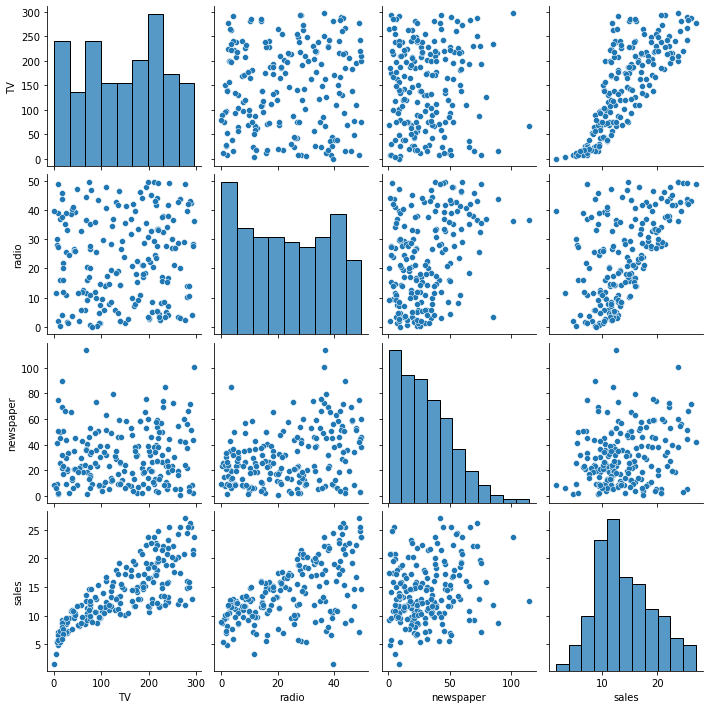

In [26]:
sns.pairplot(df)
# this also show the relatioship between each feature -> important for Polynomial Regression -> there might be a synergy between running both radio ads and newspaper ads

In [27]:
X = df.drop('sales',axis=1)
# note that for more complex algorithms we may do some pre-processing to the data, e.g. standardizing, normalizing, etc. 

In [28]:
X.head()

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [29]:
y = df['sales']

In [30]:
y.head()

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: sales, dtype: float64

In [31]:
from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [32]:
# help(train_test_split)

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [34]:
X_train.head()

,TV,radio,newspaper
42,293.6,27.7,1.8
189,18.7,12.1,23.4
90,134.3,4.9,9.3
136,25.6,39.0,9.3
51,100.4,9.6,3.6


In [35]:
len(X_train)

134

In [36]:
len(X)*2/3

133.33333333333334

In [37]:
from sklearn.linear_model import LinearRegression

In [38]:
# help(LinearRegression)^
# call to explore the hyper-parameters of the model 

In [39]:
model = LinearRegression()
# when first using a model, use the default parameters to check its baseline performance

In [40]:
model.fit(X_train, y_train)

LinearRegression()

In [41]:
pred = model.predict(X_test)
pred

array([16.58673085, 21.18622524, 21.66752973, 10.81086512, 22.25210881,
       13.31459455, 21.23875284,  7.38400509, 13.43971113, 15.19445383,
        9.01548612,  6.56945204, 14.4156926 ,  8.93560138,  9.56335776,
       12.10760805,  8.86091137, 16.25163621, 10.31036304, 18.83571624,
       19.81058732, 13.67550716, 12.45182294, 21.58072583,  7.67409148,
        5.67090757, 20.95448184, 11.89301758,  9.13043149,  8.49435255,
       12.32217788,  9.99097553, 21.71995241, 12.64869606, 18.25348116,
       20.17390876, 14.20864218, 21.02816483, 10.91608737,  4.42671034,
        9.59359543, 12.53133363, 10.14637196,  8.1294087 , 13.32973122,
        5.27563699,  9.30534511, 14.15272317,  8.75979349, 11.67053724,
       15.66273733, 11.75350353, 13.21744723, 11.06273296,  6.41769181,
        9.84865789,  9.45756213, 24.32601732,  7.68903682, 12.30794356,
       17.57952015, 15.27952025, 11.45659815, 11.12311877, 16.60003773,
        6.90611478])

In [42]:
f'MAE = {(y_test-pred).abs().mean():.2f}'
# performance evaluation: how can we evaluate quantitatively the error in a regression task -> we can to evaluate the fit of a regression algorithm

'MAE = 1.49'

In [43]:
f'MSE = {((y_test-pred)**2).mean():.2f}'

'MSE = 3.73'

In [44]:
f'RMSE = {np.sqrt((y_test-pred)**2).mean():.2f}'

'RMSE = 1.49'

In [45]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [46]:
df['sales'].mean()

14.0225

<AxesSubplot:xlabel='sales', ylabel='Count'>

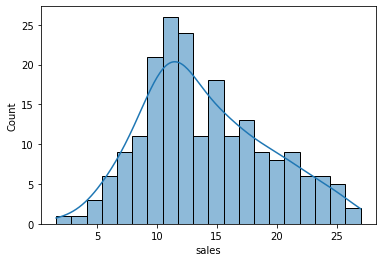

In [47]:
sns.histplot(data=df, x='sales', bins=20,kde=True)

In [48]:
mean_absolute_error(y_test,pred)
# context is everythigng: did we already have a historical model that tried to predict sales based on features? -> comapre the MAEs
# how can we judge this in terms of just my data? Consider the average sales value and the distribution of sales values -> average is 14, distribution goes form 5 to 25
# on average we're off by 1.4 which translates to 1.4=10%*14 -> a 10% error range

1.4937750024728969

In [49]:
f"{df['sales'].mean()/mean_absolute_error(y_test,pred):.2f}% error range for MAE -> my prediction is on average off by about 9%"
# is this error acceptable? -> depends on the context of the situation -> my prediction is on average off by about 10%
# problem: does consider the situation where the model is really far off only for only a few poitns

'9.39% error range for MAE -> my prediction is on average off by about 9%'

In [50]:
mean_squared_error(y_test,pred)
# punishes values that are really off
# problem: cannot be interpreted

3.7279283306815096

In [51]:
# RMSE
rmse= np.sqrt(mean_squared_error(y_test,pred))
rmse
# analogy: standard deviation of your predictions and the MSE can be thought of as the variance of our predictions  

1.9307843822347202

In [52]:
f"{df['sales'].mean()/rmse:.2f}% error range for RMSE -> my prediction is on average off by about 7%"

'7.26% error range for RMSE -> my prediction is on average off by about 7%'

In [53]:
# it is recommended to use both the MAE & RMSE -> check to see if on average we're doing good & make sure the prediction is not far off for some data poinst

In [54]:
residuals = (y_test-pred)

In [55]:
residuals.head()

95     0.313269
15     1.213775
30    -0.267530
158   -3.510865
128    2.447891
Name: sales, dtype: float64

In [56]:
residuals.describe()

count    66.000000
mean     -0.191640
std       1.935973
min      -6.017447
25%      -1.457744
50%       0.290968
75%       1.183827
max       2.982308
Name: sales, dtype: float64

<AxesSubplot:xlabel='sales', ylabel='Count'>

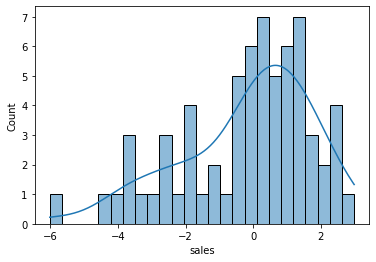

In [57]:
sns.histplot(data=residuals, kde=True,bins=25)

# the mean should be close to zero for the KDE
# here we overshoot the zero and the curve is skewed one way, but not by much

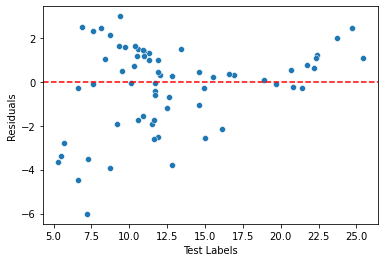

In [58]:
ax = sns.scatterplot(x=y_test, y=residuals)
ax.set(ylabel='Residuals', xlabel='Test Labels')
plt.axhline(y=0,color='red',linestyle='--')

# there should be no clear pattern / curve in the plot

In [59]:
# sns.regplot(x=y_test, y=residuals)

In [60]:
import scipy as sp

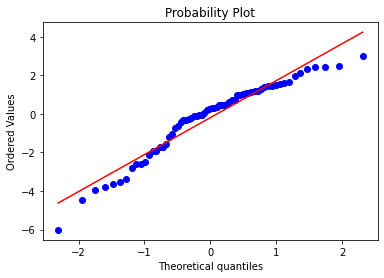

In [61]:
# Create a figure and axis to plot on
fig, ax = plt.subplots()

# probplot returns the raw values if needed
# we just want to see the plot, so we assign these values to _
sp.stats.probplot(residuals,plot=ax);

In [62]:
# Create a figure and axis to plot on
# fig, ax = plt.subplots(figsize=(6,8),dpi=100)

# probplot returns the raw values if needed
# we just want to see the plot, so we assign these values to _
# _ = sp.stats.probplot(test_res,plot=ax)
# alternative: sp.stats.probplot(residuals,plot=ax);

In [63]:
final_model = LinearRegression()

In [64]:
final_model.fit(X,y)
# we fit the final model on all the data since we've decided that these model hyperparameters are good enough on a test set, so when deployed to the real world, we want to take full advantage of the entire data set

LinearRegression()

In [65]:
model.coef_

array([0.04466512, 0.19663006, 0.00607439])

In [66]:
final_model.coef_
# beta coefficients; they come in the same order as the feature data frame we passed in 

array([ 0.04576465,  0.18853002, -0.00103749])

In [67]:
np.vectorize(round)(final_model.coef_ - model.coef_,2)

array([ 0.  , -0.01, -0.01])

In [68]:
coef_df = pd.DataFrame(data=final_model.coef_,index=X.columns,columns=['B_Coeff'])
coef_df

# note that the coefficient for newspaper expenditure is almost zero -> in term of the linear regression model this means regardless what we spend on newspaper ads the models thinks it doesn't even matter and it gives it a weight of zero thus cancelling out any value you spend on newspaper ads. In fact this is going to lower your sales, since it's a negative number

# the model thinks radio expenditures has a greater effect than TV expenditures

# for B_TV = 0.05 -> if we were to hold the other features fixed and only adjust TV, for a one unit increase in TV expenditure we expect a 0.05 increase in sales

,B_Coeff
TV,0.045765
radio,0.188530
newspaper,-0.001037


In [69]:
y_hat = final_model.predict(X)

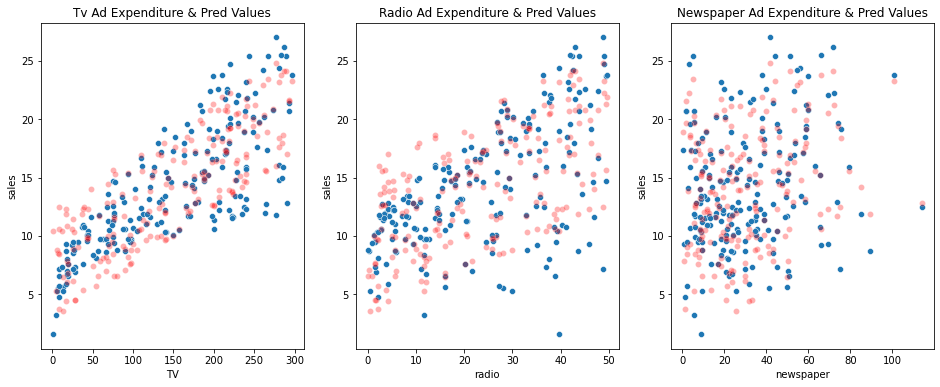

In [70]:
# this plot is rather unreliable the more features we have

fig,axes = plt.subplots(nrows=1, ncols=3,figsize=(16,6))

for i, column in enumerate(df.drop('sales', axis=1)):
    sns.scatterplot(data=df, x=column, y='sales', ax=axes[i])
    sns.scatterplot(data=df, x=column, y=y_hat, ax=axes[i],color='red',alpha=0.3)
    axes[i].set_title(f'{column.capitalize()} Ad Expenditure & Pred Values') 

In [71]:
# alternative

# fig,axes = plt.subplots(nrows=1,ncols=3,figsize=(16,6))
# 
# axes[0].plot(df['TV'],df['sales'],'o')
# axes[0].plot(df['TV'],y_hat,'o',color='red')
# axes[0].set_ylabel("Sales")
# axes[0].set_title("TV Spend")
# 
# axes[1].plot(df['radio'],df['sales'],'o')
# axes[1].plot(df['radio'],y_hat,'o',color='red')
# axes[1].set_title("Radio Spend")
# axes[1].set_ylabel("Sales")
# 
# axes[2].plot(df['newspaper'],df['sales'],'o')
# axes[2].plot(df['radio'],y_hat,'o',color='red')
# axes[2].set_title("Newspaper Spend");
# axes[2].set_ylabel("Sales")
# plt.tight_layout();

In [72]:
from joblib import dump, load

In [73]:
dump(final_model, 'final-sales-model.joblib')

['final-sales-model.joblib']

In [74]:
loaded_model = load('./final-sales-model.joblib')

In [75]:
loaded_model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [76]:
# We predict the sale values for a new campaign

X.shape

(200, 3)

In [77]:
# 149 TV, 22 Radio, 12 Newspaper
# Sales?
campaign = [[149,22,12]]

In [78]:
loaded_model.predict(campaign)

# the model will run with a MAE of 1.21 and a RMSE of 1.52 -> we can assume a similar performance on new data, as long as the new data is more or less in the range of existing data

array([13.893032])

In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [80]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [81]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

**Anscombe's Quartet and Residuals**

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/e/ec/Anscombe%27s_quartet_3.svg/850px-Anscombe%27s_quartet_3.svg.png">

<table class="wikitable">
<tbody><tr>
<th>Property
</th>
<th>Value
</th>
<th>Accuracy
</th></tr>
<tr>
<td><a href="/wiki/Mean" title="Mean">Mean</a> of <i>x</i>
</td>
<td>9
</td>
<td>exact
</td></tr>
<tr>
<td>Sample <a href="/wiki/Variance" title="Variance">variance</a> of <i>x</i>  :  <span class="mwe-math-element"><span class="mwe-math-mathml-inline mwe-math-mathml-a11y" style="display: none;"><math xmlns="http://www.w3.org/1998/Math/MathML"  alttext="{\displaystyle \sigma ^{2}}">
  <semantics>
    <mrow class="MJX-TeXAtom-ORD">
      <mstyle displaystyle="true" scriptlevel="0">
        <msup>
          <mi>&#x03C3;<!-- σ --></mi>
          <mrow class="MJX-TeXAtom-ORD">
            <mn>2</mn>
          </mrow>
        </msup>
      </mstyle>
    </mrow>
    <annotation encoding="application/x-tex">{\displaystyle \sigma ^{2}}</annotation>
  </semantics>
</math></span><img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/53a5c55e536acf250c1d3e0f754be5692b843ef5" class="mwe-math-fallback-image-inline" aria-hidden="true" style="vertical-align: -0.338ex; width:2.385ex; height:2.676ex;" alt="\sigma ^{2}"/></span>
</td>
<td>11
</td>
<td>exact
</td></tr>
<tr>
<td>Mean of <i>y</i>
</td>
<td>7.50
</td>
<td>to 2 decimal places
</td></tr>
<tr>
<td>Sample variance of <i>y</i>  :  <span class="mwe-math-element"><span class="mwe-math-mathml-inline mwe-math-mathml-a11y" style="display: none;"><math xmlns="http://www.w3.org/1998/Math/MathML"  alttext="{\displaystyle \sigma ^{2}}">
  <semantics>
    <mrow class="MJX-TeXAtom-ORD">
      <mstyle displaystyle="true" scriptlevel="0">
        <msup>
          <mi>&#x03C3;<!-- σ --></mi>
          <mrow class="MJX-TeXAtom-ORD">
            <mn>2</mn>
          </mrow>
        </msup>
      </mstyle>
    </mrow>
    <annotation encoding="application/x-tex">{\displaystyle \sigma ^{2}}</annotation>
  </semantics>
</math></span><img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/53a5c55e536acf250c1d3e0f754be5692b843ef5" class="mwe-math-fallback-image-inline" aria-hidden="true" style="vertical-align: -0.338ex; width:2.385ex; height:2.676ex;" alt="\sigma ^{2}"/></span>
</td>
<td>4.125
</td>
<td>±0.003
</td></tr>
<tr>
<td><a href="/wiki/Correlation" class="mw-redirect" title="Correlation">Correlation</a> between <i>x</i> and <i>y</i>
</td>
<td>0.816
</td>
<td>to 3 decimal places
</td></tr>
<tr>
<td><a href="/wiki/Linear_regression" title="Linear regression">Linear regression</a> line
</td>
<td><i>y</i>&#160;=&#160;3.00&#160;+&#160;0.500<i>x</i>
</td>
<td>to 2 and 3 decimal places, respectively
</td></tr>
<tr>
<td><a href="/wiki/Coefficient_of_determination" title="Coefficient of determination">Coefficient of determination</a> of the linear regression  :  <span class="mwe-math-element"><span class="mwe-math-mathml-inline mwe-math-mathml-a11y" style="display: none;"><math xmlns="http://www.w3.org/1998/Math/MathML"  alttext="{\displaystyle R^{2}}">
  <semantics>
    <mrow class="MJX-TeXAtom-ORD">
      <mstyle displaystyle="true" scriptlevel="0">
        <msup>
          <mi>R</mi>
          <mrow class="MJX-TeXAtom-ORD">
            <mn>2</mn>
          </mrow>
        </msup>
      </mstyle>
    </mrow>
    <annotation encoding="application/x-tex">{\displaystyle R^{2}}</annotation>
  </semantics>
</math></span><img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/5ce07e278be3e058a6303de8359f8b4a4288264a" class="mwe-math-fallback-image-inline" aria-hidden="true" style="vertical-align: -0.338ex; width:2.818ex; height:2.676ex;" alt="R^{2}"/></span>
</td>
<td>0.67
</td>
<td>to 2 decimal places
</td></tr></tbody></table>

In [82]:
quartet = pd.read_csv('./course-data/anscombes_quartet1.csv')

In [83]:
quartet.head()

,x,y
0,10.0,8.04
1,8.0,6.95
2,13.0,7.58
3,9.0,8.81
4,11.0,8.33


In [84]:
quartet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       11 non-null     float64
 1   y       11 non-null     float64
dtypes: float64(2)
memory usage: 304.0 bytes


In [85]:
quartet.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
x,11.0,9.000000,3.316625,4.00,6.500,9.00,11.50,14.00
y,11.0,7.500909,2.031568,4.26,6.315,7.58,8.57,10.84


<AxesSubplot:xlabel='x', ylabel='y'>

<AxesSubplot:xlabel='x', ylabel='y'>

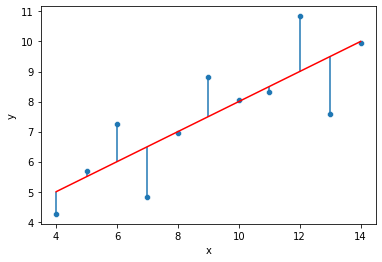

In [86]:
# y = 3.00 + 0.500x
quartet['pred_y'] = 3 + 0.5 * quartet['x']
quartet['residual'] = quartet['y'] - quartet['pred_y']

sns.scatterplot(data=quartet,x='x',y='y')
sns.lineplot(data=quartet,x='x',y='pred_y',color='red')
plt.vlines(quartet['x'],quartet['y'],quartet['y']-quartet['residual'])

<AxesSubplot:xlabel='residual', ylabel='Density'>

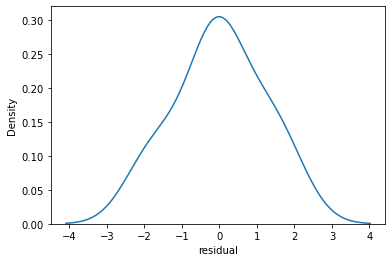

In [87]:
sns.kdeplot(quartet['residual'])

<AxesSubplot:xlabel='y', ylabel='residual'>

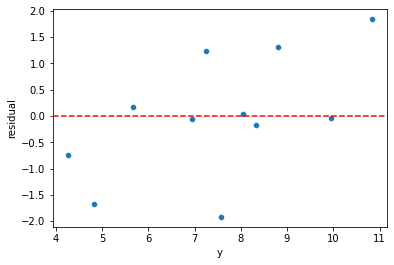

In [88]:
sns.scatterplot(data=quartet,x='y',y='residual')
plt.axhline(y=0, color='r', linestyle='--')

---

In [89]:
quartet = pd.read_csv('./course-data/anscombes_quartet2.csv')

In [90]:
quartet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       11 non-null     float64
 1   y       11 non-null     float64
dtypes: float64(2)
memory usage: 304.0 bytes


In [91]:
quartet.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
x,11.0,9.000000,3.316625,4.0,6.500,9.00,11.50,14.00
y,11.0,7.500909,2.031657,3.1,6.695,8.14,8.95,9.26


In [92]:
# quartet.columns = ['x','y']

<AxesSubplot:xlabel='x', ylabel='y'>

<AxesSubplot:xlabel='x', ylabel='y'>

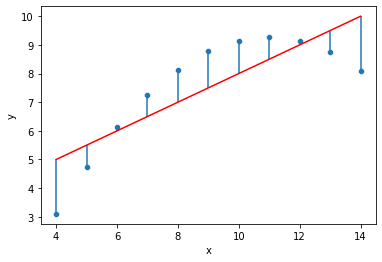

In [93]:
# y = 3.00 + 0.500x
quartet['pred_y'] = 3 + 0.5 * quartet['x']
quartet['residual'] = quartet['y'] - quartet['pred_y']

sns.scatterplot(data=quartet,x='x',y='y')
sns.lineplot(data=quartet,x='x',y='pred_y',color='red')
plt.vlines(quartet['x'],quartet['y'],quartet['y']-quartet['residual'])

<AxesSubplot:xlabel='residual', ylabel='Density'>

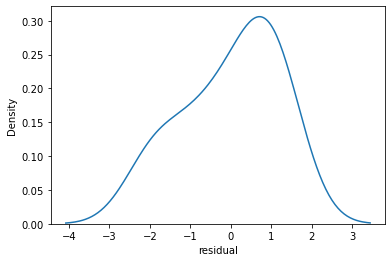

In [94]:
sns.kdeplot(quartet['residual'])

<AxesSubplot:xlabel='y', ylabel='residual'>

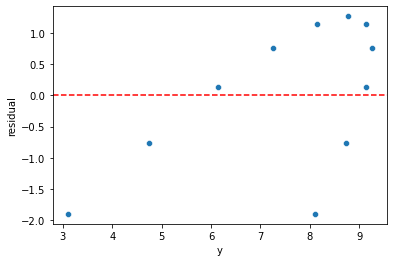

In [95]:
sns.scatterplot(data=quartet,x='y',y='residual')
plt.axhline(y=0, color='r', linestyle='--')

In [96]:
quartet = pd.read_csv('./course-data/anscombes_quartet4.csv')

In [97]:
quartet.head()
quartet.info()
quartet.describe().transpose()

,x,y
0,8.0,6.58
1,8.0,5.76
2,8.0,7.71
3,8.0,8.84
4,8.0,8.47


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       11 non-null     float64
 1   y       11 non-null     float64
dtypes: float64(2)
memory usage: 304.0 bytes


,count,mean,std,min,25%,50%,75%,max
x,11.0,9.000000,3.316625,8.00,8.00,8.00,8.00,19.0
y,11.0,7.500909,2.030579,5.25,6.17,7.04,8.19,12.5


In [98]:
# y = 3.00 + 0.500x
quartet['pred_y'] = 3 + 0.5 * quartet['x']

In [99]:
quartet['residual'] = quartet['y'] - quartet['pred_y']

<AxesSubplot:xlabel='x', ylabel='y'>

<AxesSubplot:xlabel='x', ylabel='y'>

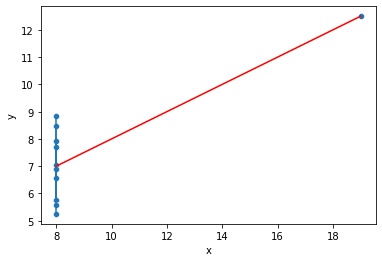

In [100]:
sns.scatterplot(data=quartet,x='x',y='y')
sns.lineplot(data=quartet,x='x',y='pred_y',color='red')
plt.vlines(quartet['x'],quartet['y'],quartet['y']-quartet['residual'])

<AxesSubplot:xlabel='residual', ylabel='Density'>

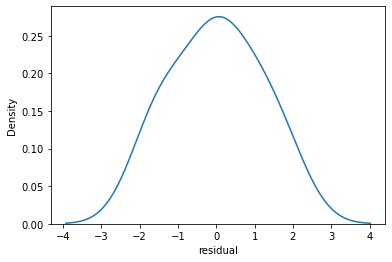

In [101]:
sns.kdeplot(quartet['residual'])

<AxesSubplot:xlabel='y', ylabel='residual'>

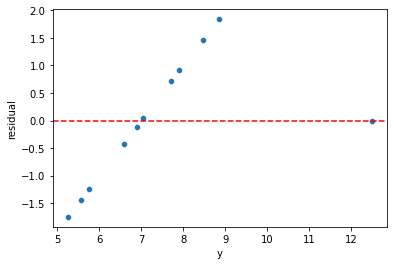

In [102]:
sns.scatterplot(data=quartet,x='y',y='residual')
plt.axhline(y=0, color='r', linestyle='--')

In [103]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [104]:
df = pd.read_csv("./course-data/Advertising.csv")

In [105]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [106]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


In [107]:
X = df.drop('sales',axis=1)

In [108]:
y = df['sales']

In [109]:
from sklearn.preprocessing import PolynomialFeatures

In [110]:
pol_conv = PolynomialFeatures(degree=2,include_bias=False)

In [111]:
pol_conv.fit(X)

# done in many tools of sklearn: defines the data range we're going to be using, afterwards we can transform the data -> since this is a very common operation, there's also a fit_transform 

# in this case fit analyses what degree we want to go to, and if the bias is included or not; it is also important to later use the get_feature_names method

PolynomialFeatures(include_bias=False)

In [112]:
pol_features = pol_conv.transform(X)

In [113]:
# alternative to the two lines above
pol_conv.fit_transform(X)

array([[ 230.1 ,   37.8 ,   69.2 , ..., 1428.84, 2615.76, 4788.64],
       [  44.5 ,   39.3 ,   45.1 , ..., 1544.49, 1772.43, 2034.01],
       [  17.2 ,   45.9 ,   69.3 , ..., 2106.81, 3180.87, 4802.49],
       ...,
       [ 177.  ,    9.3 ,    6.4 , ...,   86.49,   59.52,   40.96],
       [ 283.6 ,   42.  ,   66.2 , ..., 1764.  , 2780.4 , 4382.44],
       [ 232.1 ,    8.6 ,    8.7 , ...,   73.96,   74.82,   75.69]])

In [114]:
X.shape

(200, 3)

In [115]:
pol_features.shape

(200, 9)

In [116]:
X.iloc[0]

TV           230.1
radio         37.8
newspaper     69.2
Name: 0, dtype: float64

In [117]:
pol_features[0]

array([2.301000e+02, 3.780000e+01, 6.920000e+01, 5.294601e+04,
       8.697780e+03, 1.592292e+04, 1.428840e+03, 2.615760e+03,
       4.788640e+03])

In [118]:
# see better alternative bellow
for i,coeff in enumerate(pol_features[0]): 
    print(f'x_{i} = {coeff:.2f}')

# note that the values for the first 3 columns are our original feature terms
# the next terms are returned by the transform method: x1**2, x1*x2, x1*x3, x2**2, x2*x3,x3**2

# this way we went from 3 features to 9 features -> we expand the feature set we can train the model on -> create more signal for a linear regression

x_0 = 230.10
x_1 = 37.80
x_2 = 69.20
x_3 = 52946.01
x_4 = 8697.78
x_5 = 15922.92
x_6 = 1428.84
x_7 = 2615.76
x_8 = 4788.64


In [119]:
from sklearn.model_selection import train_test_split

In [120]:
# recall that X only has the original 3 features, we want to split on the entire polynomical feature set

# keep the parameters test_size and random_state the same as before so that we can compare performance metrics

# here it's important to pass the transformed X! 

X_train, X_test, y_train, y_test = train_test_split(pol_features, y, test_size=0.33, random_state=42)

In [121]:
from sklearn.linear_model import LinearRegression

In [228]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [124]:
y_pred = model.predict(X_test)

In [125]:
model.coef_

array([ 5.49298090e-02,  1.42197827e-02,  1.16916818e-02, -1.12988475e-04,
        1.08937883e-03, -1.01342723e-04,  2.76385341e-04,  1.44165732e-04,
        8.99438936e-05])

In [126]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [127]:
MAE = mean_absolute_error(y_test, y_pred)

In [128]:
MSE = mean_squared_error(y_test, y_pred)

In [129]:
RMSE = np.sqrt(MSE)

In [130]:
MAE

0.5475837919149621

In [131]:
RMSE

0.6784587307926914

In [132]:
print('Compare this to metrics of the previous model: MAE = 1.213, RMSE = 1.9307')

# the only way to fairly compare your previous values is if we perform the exact same train-test-split on this model as in the other one

Compare this to metrics of the previous model: MAE = 1.213, RMSE = 1.9307


In [133]:
model.coef_

array([ 5.49298090e-02,  1.42197827e-02,  1.16916818e-02, -1.12988475e-04,
        1.08937883e-03, -1.01342723e-04,  2.76385341e-04,  1.44165732e-04,
        8.99438936e-05])

In [134]:
# the option below might be better
pol_conv.get_feature_names()

['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2', 'x2^2']

In [135]:
pol_conv.get_feature_names(X.columns)

['TV',
 'radio',
 'newspaper',
 'TV^2',
 'TV radio',
 'TV newspaper',
 'radio^2',
 'radio newspaper',
 'newspaper^2']

In [136]:
# we the help of this method we can make a data frame

pol_features_df = pd.DataFrame(pol_conv.transform(X), columns=pol_conv.get_feature_names(X.columns))

In [137]:
pol_features_df.head()

,TV,radio,newspaper,TV^2,TV radio,TV newspaper,radio^2,radio newspaper,newspaper^2
0,230.1,37.8,69.2,52946.01,8697.78,15922.92,1428.84,2615.76,4788.64
1,44.5,39.3,45.1,1980.25,1748.85,2006.95,1544.49,1772.43,2034.01
2,17.2,45.9,69.3,295.84,789.48,1191.96,2106.81,3180.87,4802.49
3,151.5,41.3,58.5,22952.25,6256.95,8862.75,1705.69,2416.05,3422.25
4,180.8,10.8,58.4,32688.64,1952.64,10558.72,116.64,630.72,3410.56


In [138]:
for i, feature in enumerate(pol_features_df):
    print(f'{feature} = {model.coef_[i]:.4f}')

# note that for all non-linear features and interactions terms are almost 0

TV = 0.0549
radio = 0.0142
newspaper = 0.0117
TV^2 = -0.0001
TV radio = 0.0011
TV newspaper = -0.0001
radio^2 = 0.0003
radio newspaper = 0.0001
newspaper^2 = 0.0001


In [139]:
# create transformation
pol_converter = PolynomialFeatures(degree=3, include_bias=False)
# store transformed features
pol_features = pol_converter.fit_transform(X)
# split the transformed data
X_train, X_test, y_train, y_test = train_test_split(pol_features, y, test_size=0.33, random_state=42)
# create model
model = LinearRegression()
# train the model
model.fit(X_train, y_train)

model.coef_

feature_names = pol_converter.get_feature_names(X.columns)

for i, feature in enumerate(feature_names):
    print(f'{feature} = {model.coef_[i]:.4f}')

LinearRegression()

array([ 9.47866172e-02,  1.12357362e-02,  2.82020936e-02, -4.54876215e-04,
        1.42236468e-03, -3.31628765e-04,  1.06688679e-04,  2.72862796e-04,
        8.56237762e-05,  7.58949035e-07, -8.90849811e-07,  1.07257677e-06,
       -2.08106599e-07, -2.95238599e-06,  1.41119059e-07, -1.23516998e-06,
        1.89000490e-06, -6.03614076e-07, -1.70168971e-06])

TV = 0.0948
radio = 0.0112
newspaper = 0.0282
TV^2 = -0.0005
TV radio = 0.0014
TV newspaper = -0.0003
radio^2 = 0.0001
radio newspaper = 0.0003
newspaper^2 = 0.0001
TV^3 = 0.0000
TV^2 radio = -0.0000
TV^2 newspaper = 0.0000
TV radio^2 = -0.0000
TV radio newspaper = -0.0000
TV newspaper^2 = 0.0000
radio^3 = -0.0000
radio^2 newspaper = 0.0000
radio newspaper^2 = -0.0000
newspaper^3 = -0.0000


---

In [140]:
# create the different order poly
# split poly set of features in train / test
# fit on train
# store / save the RMSE for both the train and test
# plot the results: poly order versus error

# here we just want the error statistic and don't save the models generated

In [141]:
train_rmse_errs_list = []
test_rmse_errs_list = []

for d in range(1,10): 
    # create transformation poly_converter:X->X'
    pol_converter = PolynomialFeatures(degree=d, include_bias=False)
    # store transformed features
    pol_features = pol_converter.fit_transform(X)
    
    # split the transformed data
    X_train, X_test, y_train, y_test = train_test_split(pol_features, y, test_size=0.33, random_state=42)
    
    # create model
    model = LinearRegression()
    # train the model
    model.fit(X_train, y_train)
    
    # predict on training data
    train_pred = model.predict(X_train)
    # predict on test data
    test_pred = model.predict(X_test)
    
    # generate error statistic
    train_rmse = np.sqrt(mean_squared_error(y_train,train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test,test_pred))
    
    # append the error statistic to the list
    train_rmse_errs_list.append(train_rmse)
    test_rmse_errs_list.append(test_rmse)
    
train_rmse_errs_ser = pd.Series(train_rmse_errs_list,index=list(range(1,10)))
test_rmse_errs_ser = pd.Series(test_rmse_errs_list,index=list(range(1,10)))

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

In [142]:
# return the Series with the error statistics on the train set
train_rmse_errs_ser

1    1.552694
2    0.605770
3    0.475685
4    0.374299
5    0.241088
6    0.197651
7    3.573229
8    0.106435
9    0.120819
dtype: float64

In [143]:
# return the Series with the error statistics on the test set
test_rmse_errs_ser

# do we choose a polynomial 2 or 3? 
# 3 is the maximum we can choose; given that we don't want the added complexity for a marginal reductino of error we choose the 2nd degree model BUT for ditactic reasons we choose the 3rd degree model

1         1.930784
2         0.678459
3         0.514827
4         1.275059
5         6.410721
6        24.723799
7       550.325498
8     13162.864221
9    183513.471514
dtype: float64

Text(0, 0.5, 'RMSE')

Text(0.5, 0, 'Degree of Polynomial')

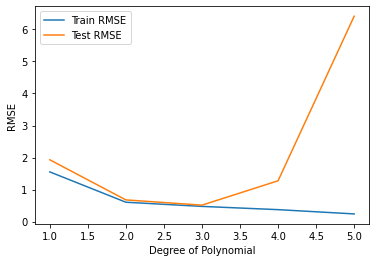

In [144]:
plt.plot(range(1,6), train_rmse_errs_ser[:5], label='Train RMSE')
plt.plot(range(1,6), test_rmse_errs_ser[:5], label='Test RMSE')


plt.legend(loc='upper left')
plt.ylabel('RMSE')
plt.xlabel('Degree of Polynomial')

Text(0, 0.5, 'RMSE')

Text(0.5, 0, 'Degree of Polynomial')

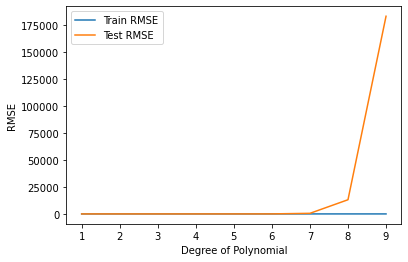

In [145]:
plt.plot(range(1,len(train_rmse_errs_ser)+1), train_rmse_errs_ser, label='Train RMSE')
plt.plot(range(1,len(test_rmse_errs_ser)+1), test_rmse_errs_ser, label='Test RMSE')


plt.legend(loc='upper left')
plt.ylabel('RMSE')
plt.xlabel('Degree of Polynomial')

In [146]:
final_poly_trafo = PolynomialFeatures(degree=3, include_bias=False)

In [147]:
X_trafo = final_poly_trafo.fit_transform(X)

In [148]:
final_model = LinearRegression()

In [149]:
final_model.fit(X_trafo, y)

LinearRegression()

In [150]:
from joblib import dump, load

In [151]:
dump(final_model, 'final-poly-model.joblib')

['final-poly-model.joblib']

In [152]:
dump(final_poly_trafo, 'final-poly-trafo.joblib')

['final-poly-trafo.joblib']

---

In [153]:
loaded_trafo = load('final-poly-trafo.joblib')

In [154]:
loaded_model = load('final-poly-model.joblib')

In [155]:
campaign = [[149,22,21]]

In [156]:
trafo_campaign = loaded_trafo.fit_transform(campaign)

In [157]:
loaded_model.predict(trafo_campaign)

array([14.60555347])

In [158]:
print('Compare this to the predicted sales from the linear model with no polynomial features of 13.893032')

Compare this to the predicted sales from the linear model with no polynomial features of 13.893032


In [159]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [160]:
df = pd.read_csv('./course-data/Advertising.csv')

In [161]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [162]:
X = df.drop('sales',axis=1)

In [163]:
y = df['sales']

---

In [164]:
from sklearn.preprocessing import PolynomialFeatures

In [165]:
pol_trafo = PolynomialFeatures(degree=3, include_bias=False)

In [166]:
pol_trafo.fit(X)

PolynomialFeatures(degree=3, include_bias=False)

In [167]:
pol_trafo.get_feature_names(X.columns)

['TV',
 'radio',
 'newspaper',
 'TV^2',
 'TV radio',
 'TV newspaper',
 'radio^2',
 'radio newspaper',
 'newspaper^2',
 'TV^3',
 'TV^2 radio',
 'TV^2 newspaper',
 'TV radio^2',
 'TV radio newspaper',
 'TV newspaper^2',
 'radio^3',
 'radio^2 newspaper',
 'radio newspaper^2',
 'newspaper^3']

In [168]:
pol_features = pol_trafo.transform(X)

In [169]:
# ndarray of poly trafo features
pol_features.shape

(200, 19)

In [170]:
# dataframe of poly trafo features
X_pol_trafo = pd.DataFrame(pol_features, columns=pol_trafo.get_feature_names(X.columns))

In [171]:
X_pol_trafo.head()

,TV,radio,newspaper,TV^2,TV radio,TV newspaper,radio^2,radio newspaper,newspaper^2,TV^3,TV^2 radio,TV^2 newspaper,TV radio^2,TV radio newspaper,TV newspaper^2,radio^3,radio^2 newspaper,radio newspaper^2,newspaper^3
0,230.1,37.8,69.2,52946.01,8697.78,15922.92,1428.84,2615.76,4788.64,1.218288e+07,2001359.178,3663863.892,328776.084,601886.376,1101866.064,54010.152,98875.728,181010.592,331373.888
1,44.5,39.3,45.1,1980.25,1748.85,2006.95,1544.49,1772.43,2034.01,8.812112e+04,77823.825,89309.275,68729.805,78873.135,90513.445,60698.457,69656.499,79936.593,91733.851
2,17.2,45.9,69.3,295.84,789.48,1191.96,2106.81,3180.87,4802.49,5.088448e+03,13579.056,20501.712,36237.132,54710.964,82602.828,96702.579,146001.933,220434.291,332812.557
3,151.5,41.3,58.5,22952.25,6256.95,8862.75,1705.69,2416.05,3422.25,3.477266e+06,947927.925,1342706.625,258412.035,366031.575,518470.875,70444.997,99782.865,141338.925,200201.625
4,180.8,10.8,58.4,32688.64,1952.64,10558.72,116.64,630.72,3410.56,5.910106e+06,353037.312,1909016.576,21088.512,114034.176,616629.248,1259.712,6811.776,36834.048,199176.704


In [172]:
pol_features_df.shape

(200, 9)

---

In [173]:
from sklearn.model_selection import train_test_split

In [174]:
X_train, X_test, y_train, y_test = train_test_split(X_pol_trafo, y, test_size=0.33, random_state=42)

---

In [175]:
from sklearn.preprocessing import StandardScaler

In [176]:
scaler = StandardScaler()

In [177]:
# we have to fit the instance of the StandardScaler to compute the statistics; it is important to avoid data leakage (from the test set)!
scaler.fit(X_train)

StandardScaler()

In [178]:
X_train_scaled = scaler.transform(X_train)

In [179]:
X_test_scaled = scaler.transform(X_test)

In [180]:
for i, column in enumerate(X_pol_trafo):
    print(f'{column}: {X_train_scaled[0][i]}')

TV: 1.6675933595243773
radio: 0.26512404474449547
newspaper: -1.395536624584335
TV^2: 2.2015037251311553
TV radio: 1.2775702597215366
TV newspaper: -0.9050233092675088
radio^2: -0.021316020241327022
radio newspaper: -0.8758223006221503
newspaper^2: -0.8399005581595183
TV^3: 2.64499976035433
TV^2 radio: 1.8207324927559239
TV^2 newspaper: -0.6501089609340481
TV radio^2: 0.656672040208119
TV radio newspaper: -0.6414214631292395
TV newspaper^2: -0.6127684143457218
radio^3: -0.23015660766502286
radio^2 newspaper: -0.7133113005297929
radio newspaper^2: -0.6502876624686
newspaper^3: -0.5691177845412948


---

In [181]:
from sklearn.linear_model import Ridge

In [182]:
# help(Ridge)

In [183]:
ridge_model = Ridge(alpha=10)

In [184]:
ridge_model.fit(X_train_scaled, y_train)

Ridge(alpha=10)

In [185]:
ridge_test_pred = ridge_model.predict(X_test_scaled)

In [186]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [187]:
MAE = mean_absolute_error(y_test, ridge_test_pred)

In [188]:
MAE

0.6329556348463364

In [189]:
RMSE = np.sqrt(mean_squared_error(y_test, ridge_test_pred))

In [190]:
RMSE

0.8927190051123458

---

In [191]:
from sklearn.linear_model import RidgeCV

In [192]:
# we use all the default values; alphas=(0.1, 1.0, 10.0)
ridge_cv_model = RidgeCV()

In [193]:
# we use the training set for puposes of hyper-parameter tuning. With CV the train set is split into train set and validation set. In tis case y_test becomes the hold out set
ridge_cv_model.fit(X_train_scaled,y_train)

RidgeCV(alphas=array([ 0.1,  1. , 10. ]))

In [194]:
# to determine what alpha is performing the best, the model is using the default scoring metric 
ridge_cv_model.alpha_

0.1

In [195]:
from sklearn.metrics import SCORERS

In [196]:
# SCORERS.keys()

In [197]:
ridge_cv_model = RidgeCV(scoring='neg_mean_absolute_error')

In [198]:
ridge_cv_model.fit(X_train_scaled,y_train)

RidgeCV(alphas=array([ 0.1,  1. , 10. ]), scoring='neg_mean_absolute_error')

In [199]:
ridge_cv_model.alpha_

0.1

In [200]:
ridge_cv_test_pred = ridge_cv_model.predict(X_test_scaled)

In [201]:
MAE = mean_absolute_error(y_test, ridge_cv_test_pred)

In [202]:
# versus ridge_no_cv with 0.6329556348463364
MAE

0.43430757664842945

In [203]:
RMSE = np.sqrt(mean_squared_error(y_test, ridge_cv_test_pred))

In [204]:
# verus ridge_no_cv_RMSE = 0.8927190051123458
RMSE
# with an alpha value of 0.1 (which was found to be the best alpha value according to CV on the training set) and against the hold-out test (we do NOT tune based off this test resutl)

0.5635899169556882

In [205]:
ridge_cv_model.coef_

array([ 5.84681185,  0.52142086,  0.71689997, -6.17948738,  3.75034058,
       -1.36283352, -0.08571128,  0.08322815, -0.34893776,  2.16952446,
       -0.47840838,  0.68527348,  0.63080799, -0.5950065 ,  0.61661989,
       -0.31335495,  0.36499629,  0.03328145, -0.13652471])

In [206]:
feature_names = pol_trafo.get_feature_names(X.columns)

for i, feature in enumerate(feature_names):
    print(f'{feature} = {ridge_cv_model.coef_[i]:.4f}')
    
# note that none of this coefficients are zero (or close to zero)

TV = 5.8468
radio = 0.5214
newspaper = 0.7169
TV^2 = -6.1795
TV radio = 3.7503
TV newspaper = -1.3628
radio^2 = -0.0857
radio newspaper = 0.0832
newspaper^2 = -0.3489
TV^3 = 2.1695
TV^2 radio = -0.4784
TV^2 newspaper = 0.6853
TV radio^2 = 0.6308
TV radio newspaper = -0.5950
TV newspaper^2 = 0.6166
radio^3 = -0.3134
radio^2 newspaper = 0.3650
radio newspaper^2 = 0.0333
newspaper^3 = -0.1365


In [207]:
# ridge_cv_model.best_score_

---

In [208]:
from sklearn.linear_model import LassoCV

# there are two ways to determine the alpha hyperparameter: (a) provide list of alphas as an array (b) alpha can be set automatically by the class based off epsilon and n_alphas (we use the default values)

In [209]:
lasso_cv_model = LassoCV(max_iter=1000000)

# another solution would be lasso_cv_model = LassoCV(eps=0.1)

In [210]:
lasso_cv_model.fit(X_train_scaled, y_train)

# the warning (nor an error) means that the scochastic search for the alpha value did not converge -> quick fix: (a) increase the max. number of iterations in the model instantiation or (b) increase the epsilon search value; epsilon is the length of the path, i.e. the ratio alpha_min / alpha_max. There is also the possiblity to play with the tolerance level of the model. 

LassoCV(max_iter=1000000)

In [211]:
lasso_cv_model.alpha_

0.004968802520343366

In [212]:
lasso_cv_test_pred = lasso_cv_model.predict(X_test_scaled)

In [213]:
# versus MAE_ridge_cv = 0.43430757664842945

MAE = mean_absolute_error(y_test, lasso_cv_test_pred)
MAE

0.46291883026932984

In [214]:
# versus RMSE_ridge_cv = 0.5635899169556882

RMSE = np.sqrt(mean_squared_error(y_test, lasso_cv_test_pred))
RMSE

0.5785146895301977

In [215]:
feature_names = pol_trafo.get_feature_names(X.columns)

for i, feature in enumerate(feature_names):
    print(f'{feature} = {lasso_cv_model.coef_[i]:.4f}')
    
# note that allthough the performce is less than RidgeCV, many of the beta values are zero -> the model is less complex, we drop almost half of all those features and we get almost the exact same performance. Beta values are still hard to interpret. 
# we could also expand the search for the best possible Lasso by addint in more feature coefficients and getting a better performance model. Trade-off: complex model with high performance  versus simple model (easier to interpret) with less performance

TV = 5.1961
radio = 0.4304
newspaper = 0.2988
TV^2 = -4.8042
TV radio = 3.4667
TV newspaper = -0.4051
radio^2 = 0.0000
radio newspaper = 0.0000
newspaper^2 = 0.0000
TV^3 = 1.3526
TV^2 radio = -0.0000
TV^2 newspaper = 0.0000
TV radio^2 = 0.1488
TV radio newspaper = -0.0000
TV newspaper^2 = 0.0000
radio^3 = 0.0000
radio^2 newspaper = 0.0965
radio newspaper^2 = 0.0000
newspaper^3 = 0.0435


---

In [216]:
lasso_cv_model = LassoCV(eps=0.1)

In [217]:
lasso_cv_model.fit(X_train_scaled, y_train)

# the warning (nor an error) means that the scochastic search for the alpha value did not converge -> quick fix: (a) increase the max. number of iterations in the model instantiation or (b) increase the epsilon search value; epsilon is the length of the path, i.e. the ratio alpha_min / alpha_max. There is also the possiblity to play with the tolerance level of the model. 

LassoCV(eps=0.1)

In [218]:
lasso_cv_model.alpha_

0.4968802520343365

In [219]:
lasso_cv_test_pred = lasso_cv_model.predict(X_test_scaled)

In [220]:
# versus MAE_ridge_cv = 0.43430757664842945

MAE = mean_absolute_error(y_test, lasso_cv_test_pred)
MAE

0.6791873341672893

In [221]:
# versus RMSE_ridge_cv = 0.5635899169556882

RMSE = np.sqrt(mean_squared_error(y_test, lasso_cv_test_pred))
RMSE

1.0399114953979072

In [222]:
feature_names = pol_trafo.get_feature_names(X.columns)

for i, feature in enumerate(feature_names):
    print(f'{feature} = {lasso_cv_model.coef_[i]:.4f}')
    
# note that allthough the performce is less than RidgeCV and LassoCV with more iterations, the model is only considering two features -> models is less complex and we can easily interpret this model

TV = 0.9675
radio = 0.0000
newspaper = 0.0000
TV^2 = 0.0000
TV radio = 3.8428
TV newspaper = 0.0000
radio^2 = 0.0000
radio newspaper = 0.0000
newspaper^2 = 0.0000
TV^3 = 0.0000
TV^2 radio = 0.0000
TV^2 newspaper = 0.0000
TV radio^2 = 0.0000
TV radio newspaper = 0.0000
TV newspaper^2 = 0.0000
radio^3 = 0.0000
radio^2 newspaper = 0.0000
radio newspaper^2 = 0.0000
newspaper^3 = 0.0000


---

In [223]:
# In a start here! 

from sklearn.linear_model import ElasticNetCV

In [224]:
# note that l1_ratio refers to the alpha shows in the formula and alphas the lambda outside the beta terms

elastic_cv_model = ElasticNetCV(l1_ratio=[.1, .5, .7, .9, .95, .99, 1],max_iter=1000000)

In [225]:
elastic_cv_model.fit(X_train_scaled, y_train)

ElasticNetCV(l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1], max_iter=1000000)

In [226]:
# the model disregards Ridge completely
elastic_cv_model.l1_ratio_

1.0

In [227]:
# note that this model is identical to the Lasso model with max_iter=1000000
elastic_cv_model.alpha_

0.004968802520343366